In [181]:
import numpy as np
import pandas as pd
import json

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt

In [2]:
def read_file(path):
    return pd.io.json.read_json(get_path(path))


get_path = lambda path: f'./json/{path}.json'
files = ["book", "patron", "rent"]
dfs = dict(zip(files, map(read_file, files)))

## Book that store in 1 library but rented a lot in another library

In [17]:
rent_by_title_library = dfs['rent'].groupby(['title', 'library']).size().sort_values(ascending=False)
rent_by_title_library.name = 'rent_count'

In [19]:
book_by_title_library = dfs['book'].groupby(['title', 'library']).size().sort_values(ascending=False)
book_by_title_library.name = 'book_count'

In [25]:
tl = (pd.concat([rent_by_title_library, book_by_title_library], axis=1)
        .dropna()
    )
print(tl.shape)

(129480, 2)


In [66]:
book_multiple_library = tl[tl.index.get_level_values(0).duplicated(keep=False)].sort_index(level=[0])
book_multiple_library

rent_count  \
title                                              library                                                         
"Good coup" gone bad : Thailand's political dev... Arts Library                                              3.0   
                                                   Political Science Library                                 5.0   
"ข้ออ้าง" การปฏิวัติ-รัฐประหาร : กบฏในการเมืองไ... Political Science Library                                 6.0   
                                                   Thailand and ASEAN Information Center (6th Floor)         1.0   
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library (5th Floor)                               7.0   
...                                                                                                          ...   
ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isaa... Education Library                                         1.0   
ไฮดี้ = Heidi                                      Arts Library                                              1.0   
                                                   Central Library : Juvenile Collection (4th Floor)         5.0   
ไฮเทคาถาปาฏิหาริย์ ว่าด้วยวิทยาศาสตร์และเทคโนโล... Central Library (5th Floor)                               2.0   
                                                   Thailand and ASEAN Information Center (6th Floor)         1.0   

                                                                                                      book_count  
title                                              library                                                        
"Good coup" gone bad : Thailand's political dev... Arts Library                                              3.0  
                                                   Political Science Library                                 5.0  
"ข้ออ้าง" การปฏิวัติ-รัฐประหาร : กบฏในการเมืองไ... Political Science Library                                15.0  
                                                   Thailand and ASEAN Information Center (6th Floor)         2.0  
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library (5th Floor)                              10.0  
...                                                                                                          ...  
ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isaa... Education Library                                         3.0  
ไฮดี้ = Heidi                                      Arts Library                                             19.0  
                                                   Central Library : Juvenile Collection (4th Floor)        11.0  
ไฮเทคาถาปาฏิหาริย์ ว่าด้วยวิทยาศาสตร์และเทคโนโล... Central Library (5th Floor)                              10.0  
                                                   Thailand and ASEAN Information Center (6th Floor)         2.0  

[35101 rows x 2 columns]

In [67]:
book_multiple_library['ratio'] = book_multiple_library['rent_count'] / book_multiple_library['book_count']

In [80]:
high_rent_sort = book_multiple_library[book_multiple_library['ratio'] >= 1].sort_values('rent_count', ascending=False)
high_rent_sort.head()

,,rent_count,book_count,ratio
title,library,,,
ใต้เงาอสูร,Central Library (4th Floor),40.0,40.0,1.0
การต่างประเทศไทยในยุคสงครามเย็น,Political Science Library,30.0,30.0,1.0
ทฤษฎีการเมืองกับความสัมพันธ์ระหว่างประเทศ,Political Science Library,25.0,25.0,1.0
การบริหารงานคลังรัฐบาล,Central Library (5th Floor),24.0,24.0,1.0
เคมี = Chemistry,Science Library,19.0,19.0,1.0


In [123]:
button = widgets.Button(description="Next")
output = widgets.Output()

display(button, output)
index = 0

def on_button_clicked(b):
    with output:
        title = high_rent_sort.iloc[index].name[0]
        book_multiple_library.loc[title]
        display(title)
        display(book_multiple_library.loc[title])
        
def clicked(b):
    global index
    index += 1
    output.clear_output()
    display(button)
    on_button_clicked(b)

button.on_click(clicked)

Button(description='Next', style=ButtonStyle())

Output()

In [135]:
book_multiple_library.loc[book_multiple_library.index.get_level_values(0)[0]].apply(print)

library
Arts Library                 3.0
Political Science Library    5.0
Name: rent_count, dtype: float64
library
Arts Library                 3.0
Political Science Library    5.0
Name: book_count, dtype: float64
library
Arts Library                 1.0
Political Science Library    1.0
Name: ratio, dtype: float64


rent_count    None
book_count    None
ratio         None
dtype: object

## Compare

\[bcA bcB<br/>
  rA rB\]

In [170]:
def compare(ser):
    book = ser['book_count'].values
    ratio = ser['ratio'].values
    idx_min = np.argmin(ratio)
    idx_max = np.argmax(ratio)
#     print(book[idx_max], book[idx_min])
    unbalance = book[idx_max] < book[idx_min]
    return unbalance
    
book_multiple_library.iloc[:].groupby(level=0).filter(compare)

rent_count  \
title                                              library                                                         
"ข้ออ้าง" การปฏิวัติ-รัฐประหาร : กบฏในการเมืองไ... Political Science Library                                 6.0   
                                                   Thailand and ASEAN Information Center (6th Floor)         1.0   
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library (5th Floor)                               7.0   
                                                   Political Science Library                                 9.0   
"คนซิ่งอีสาน" : ร่างกาย กามารมณ์ อัตลักษณ์ และเ... Arts Library                                              1.0   
...                                                                                                          ...   
ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isaa... Education Library                                         1.0   
ไฮดี้ = Heidi                                      Arts Library                                              1.0   
                                                   Central Library : Juvenile Collection (4th Floor)         5.0   
ไฮเทคาถาปาฏิหาริย์ ว่าด้วยวิทยาศาสตร์และเทคโนโล... Central Library (5th Floor)                               2.0   
                                                   Thailand and ASEAN Information Center (6th Floor)         1.0   

                                                                                                      book_count  \
title                                              library                                                         
"ข้ออ้าง" การปฏิวัติ-รัฐประหาร : กบฏในการเมืองไ... Political Science Library                                15.0   
                                                   Thailand and ASEAN Information Center (6th Floor)         2.0   
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library (5th Floor)                              10.0   
                                                   Political Science Library                                14.0   
"คนซิ่งอีสาน" : ร่างกาย กามารมณ์ อัตลักษณ์ และเ... Arts Library                                              6.0   
...                                                                                                          ...   
ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isaa... Education Library                                         3.0   
ไฮดี้ = Heidi                                      Arts Library                                             19.0   
                                                   Central Library : Juvenile Collection (4th Floor)        11.0   
ไฮเทคาถาปาฏิหาริย์ ว่าด้วยวิทยาศาสตร์และเทคโนโล... Central Library (5th Floor)                              10.0   
                                                   Thailand and ASEAN Information Center (6th Floor)         2.0   

                                                                                                         ratio  
title                                              library                                                      
"ข้ออ้าง" การปฏิวัติ-รัฐประหาร : กบฏในการเมืองไ... Political Science Library                          0.400000  
                                                   Thailand and ASEAN Information Center (6th Floor)  0.500000  
"ข้ออ้าง" การปฏิวัติ-รัฐประหารในการเมืองไทยสมัย... Central Library (5th Floor)                        0.700000  
                                                   Political Science Library                          0.642857  
"คนซิ่งอีสาน" : ร่างกาย กามารมณ์ อัตลักษณ์ และเ... Arts Library                                       0.166667  
...                                                                                                        ...  
ไอแซก อาซิมอฟ ถาม-ตอบเรื่องโลกและจักรวาล = Isaa... Education Library                                  0.333333  
ไฮดี้ = Heidi                                      Arts Library    

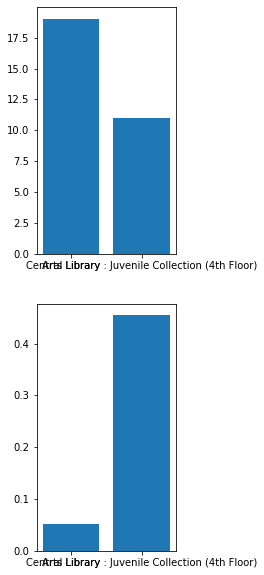

In [201]:
title = 'ไฮดี้ = Heidi'
x = book_multiple_library.loc[title].index
d = book_multiple_library.loc[title].values
fig, axs = plt.subplots(2)
axs[0].bar(x=x, 
           height=d[:,1])
axs[1].bar(x=x, 
           height=d[:,2])
fig.set_size_inches(2.5, 10)